In [2]:
import pandas as pd
import numpy as np 

%matplotlib inline 
pd.set_option('display.mpl_style', 'default')

In [3]:
def extractCounty(row):
    county_state = row["Geo_NAME"]
    return county_state.split(",")[1].strip()

In [4]:
def extractState(row):
    county_state = row["Geo_NAME"]
    return county_state.split(",")[2].strip()

#2010 ACS Data 

In [5]:
df2010 = pd.read_csv("acs_2010.csv", dtype = {'Geo_TRACT': object})

In [6]:
cols = list(df2010.columns[55:])
cols.insert(0,df2010.columns[2])
cols.insert(1,df2010.columns[18])
df_filtered = df2010[cols]

In [7]:
df_filtered.loc[:,('County')] = df_filtered.apply(extractCounty, axis = 1)
df_filtered.loc[:,('State')] = df_filtered.apply(extractState, axis = 1)

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:411: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
acs_2009 = df_filtered

#2013 ACS Data

In [18]:
df2013 = pd.read_csv("acs_2013.csv", dtype = {'Geo_TRACT': object})

In [19]:
cols = list(df2013.columns[55:])
cols.insert(0,df2013.columns[2])
cols.insert(1,df2013.columns[18])
df2013 = df2013[cols]

In [20]:
acs_2013 = df2013.drop(['SE_T145_001', 'SE_T145_002', 'SE_T145_003', 'SE_T145_004', 'SE_T145_005'], axis=1)

In [21]:
acs_2013.loc[:,('County')] = acs_2013.apply(extractCounty, axis = 1)
acs_2013.loc[:,('State')] = acs_2013.apply(extractState, axis = 1)

####Spark Data

In [9]:
n = 0 

msa_list = [] 
for observation in open("msaCluster_more_features.txt"): 
    li = [] 
    msa = eval(observation)
    li.extend(msa[0])
    li.extend(msa[1])
    msa_list.append(li)

In [131]:
attribute_names = ['year', 'state', 'msa', 'county', 'census_tract', 'census_tract_pop', 'census_tract_min_pop', \
               'owner_occupied', 'msa_median_inc', 'loan_amount', 'income', 'ratio', 'count', 'one_to_four_family_homes', \
               'Owner-occupied_as_a_principal dwelling', 'Not_owner-occupied_as_a_principal dwelling', \
               'Owner-Occupancy_NA', 'Refinancing', 'Home_Purchases', 'Loan_Purpose_NA', 'Male', 'Female', \
               'White', 'Black', 'Asian', 'Other_Race', 'Loan_Originated', 'Application_denied', \
               'Loan_purchased_by_the_institution', 'Application_Withdrawn', 'Application_Approved_Not_Accepted', \
               'Preapproval_Denied', 'Preapproval_Accepted_Not_Accepted', 'Loan_Origination_NA']

In [10]:
msa = pd.DataFrame(msa_list)

In [11]:
msa_2007 = msa[msa[0] == '2007']

In [12]:
msa_2007.head() 

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,2007,TX,Lubbock - TX,Lubbock County,0020.01,1988,19.570000,533,48900,8745,...,0,18,54,16,22,7,3,0,0,3
3,2007,MI,"Detroit, Livonia, Dearborn - MI",Wayne County,5422.00,4731,97.610001,1228,53800,48857,...,4,91,127,235,36,52,71,0,0,33
6,2007,NJ,"Wilmington - DE, MD, NJ",Salem County,0217.00,2082,6.150000,550,73900,25502,...,6,41,82,33,31,18,11,0,0,5
12,2007,TX,"Dallas, Plano, Irving - TX",Dallas County,0032.01,277,66.059998,29,63200,19777,...,2,41,31,15,23,9,2,0,0,3
14,2007,IL,Peoria - IL,Peoria County,0026.00,1951,8.660000,720,61800,14760,...,0,17,87,44,12,9,5,0,0,3


In [13]:
def cleanCT(row):
    ct = row[4]
    return ct.replace(".", "")

In [14]:
msa_2007[4] = msa_2007.apply(cleanCT, axis = 1)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
testMerge = pd.merge(msa_2007, acs_2009, left_on = [3, 4], right_on = ['County', 'Geo_TRACT'])

In [16]:
testMerge.drop(['Geo_TRACT', 'Geo_NAME', 'County', 'State', 'SE_T147_001'], axis = 1, inplace = True)
# testMerge.drop(['County', 'State'], axis = 1, inplace = True)

In [132]:
# for i, j in enumerate(testMerge.columns): print i, j
# attribute_names.extend(list(testMerge.columns)[34:])

In [17]:
Census_Tracts_Store = testMerge[[0, 1, 2, 3, 4]]

In [18]:
testMerge.drop([0, 1, 2, 3, 4], axis = 1, inplace = True)

In [20]:
testMerge = testMerge.dropna()

In [93]:
X = testMerge.values

####K-Means Clustering

In [94]:
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from datetime import datetime
import matplotlib.pyplot as plt

In [95]:
data = scale(X)

In [96]:
n_samples, n_features = data.shape

In [97]:
clusters = [2,3,4,5,6,7,8,9,10]

In [98]:
wss = []

In [99]:
startTime = datetime.now()
print startTime
for count in clusters: 
    estimator = KMeans(n_clusters = count)
    estimator.fit(data)
    wss_num = estimator.inertia_
    wss.append(wss_num)
    
print np.diff(wss)
print datetime.now() - startTime

2015-07-25 15:19:57.897030
[-171227.09132876  -87987.65946042  -80619.27845094  -52564.47413922
  -52189.32832359  -50089.08715324  -38073.23886361  -35317.77262393]
0:02:32.577234


In [100]:
difference = np.diff(wss)

In [101]:
difference

array([-171227.09132876,  -87987.65946042,  -80619.27845094,
        -52564.47413922,  -52189.32832359,  -50089.08715324,
        -38073.23886361,  -35317.77262393])

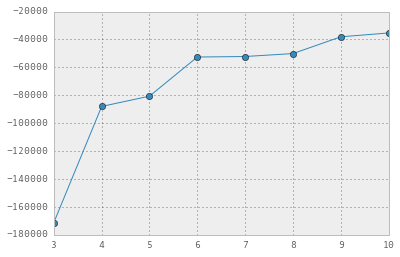

In [106]:
plt.plot([3,4,5,6,7,8,9,10], difference, '-o')

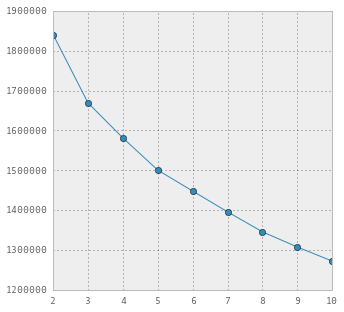

In [105]:
fig, ax = plt.subplots(figsize = (5,5))
plt.plot([2, 3,4,5,6,7,8,9,10], wss, '-o')

####Based on the elbow method, it appears 6 clusters might be the optimal amount to group by. 

In [116]:
estimator = KMeans(n_clusters = 6)
estimator.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [117]:
centroids = pd.DataFrame(estimator.cluster_centers_)

In [118]:
# for col in centroids.columns:
#     centroids[col] = centroids[col].apply(lambda x: (x * nyc_rac_grouped[col].std()) + nyc_rac_grouped[col].mean())
centroids.columns = testMerge.columns

In [119]:
for col in centroids:
    centroids[col] = centroids[col].apply(lambda x: (x * testMerge[col].std()) + testMerge[col].mean())

In [121]:
centroids.ix[0]#.transpose()

5                3991.665569
6                  27.663797
7                1034.239719
8               75168.040584
9              110435.719137
10              52426.232908
11                783.458970
12                283.826533
13             365675.274177
14                264.998420
15                 18.626163
16                  0.201950
17                157.203861
18                103.925088
19                 22.697583
20                  0.000000
21                283.826533
22                181.248824
23                 11.447856
24                 29.438918
25                 61.690935
26                134.591089
27                 52.669858
28                 39.078286
29                 22.857115
30                 26.616352
31                  0.031261
32                  0.003730
33                  7.978843
SE_T013_001      4120.396045
SE_T013_002      3027.752303
SE_T013_003       161.571698
SE_T013_004        11.695424
SE_T013_005       604.602528
SE_T013_006   

In [60]:
testMSA = msa_2007

In [64]:
testMSA.drop([0, 1, 2, 3, 4], axis = 1, inplace = True)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [69]:
testdata = scale(testMSA.values)

In [74]:
startTime = datetime.now()
print startTime
wss = []
for count in clusters: 
    estimator = KMeans(n_clusters = count)
    estimator.fit(testdata)
    wss_num = estimator.inertia_
    wss.append(wss_num)
    
print datetime.now() - startTime

2015-07-25 14:48:00.096061
0:01:20.218912


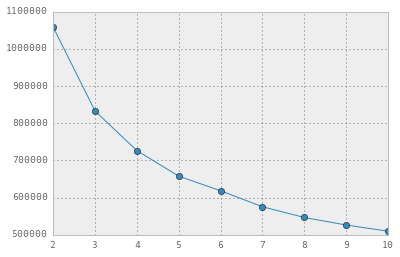

In [78]:
plt.plot([2,3,4,5,6,7,8,9,10], wss, '-o')

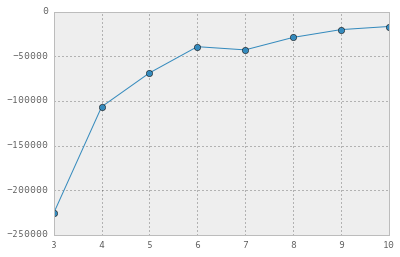

In [82]:
plt.plot([3,4,5,6,7,8,9,10], np.diff(wss), '-o')